# Task 2.3 - Random Forest for ClimateWins

# The Scripts Contents

1. Importing Libraries and Data

2. Data Wrangling

3. Reshaping for modeling

4. Data Split

5. Random Forest Model

6. Uncovering Feature Importances

# 1. Importing Libraries and Data

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from numpy import unique
from numpy import reshape
from keras.models import Sequential
from keras.layers import Conv1D, Conv2D, Dense, BatchNormalization, Flatten, MaxPooling1D, Dropout
from keras.utils import to_categorical
from sklearn import datasets  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree

import warnings
warnings.filterwarnings("ignore")

In [4]:
path = r'C:\Users\Tim\Desktop\Data Analytics Intro\Machine Learning\Data sets'

In [5]:
# Set display options to show all columns

pd.set_option('display.max_columns', None)

In [6]:
x = pd.read_csv(os.path.join(path, 'Original Data X_cleaned.csv'))

In [26]:
df = pd.read_csv(os.path.join(path, 'Original Data', 'Dataset-weather-prediction-dataset-processed.csv'))

In [7]:
df1 = pd.read_csv(os.path.join(path, 'Original Data', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

In [34]:
df.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_wind_speed,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_wind_speed,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_snow_depth,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,GDANSK_cloud_cover,GDANSK_humidity,GDANSK_precipitation,GDANSK_snow_depth,GDANSK_temp_mean,GDANSK_temp_min,GDANSK_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_snow_depth,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_wind_speed,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_wind_speed,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_wind_speed,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_wind_speed,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_snow_depth,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_wind_speed,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_snow_depth,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,ROMA_cloud_cover,ROMA_wind_speed,ROMA_humidity,ROMA_pressure,ROMA_sunshine,ROMA_temp_mean,SONNBLICK_cloud_cover,SONNBLICK_wind_speed,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,0.7,6.5,0.8,10.9,1,0.81,1.0195,0.88,0.00,7.0,3.7,-0.9,7.9,4,0.67,1.017,0.44,0.01,2.3,2.4,-0.4,5.1,7,7.7,0.85,1.0032,0.07,0.25,0.0,9.3,7.4,11.0,8,5.4,0.83,1.0161,0.12,0.08,0,0.0,10.0,7.0,11.5,8,0.91,0.00,0,0.8,-0.3,1.6,7,0.91,1.0010,0.13,0.22,0,0.0,10.6,9.4,8.3,2.9,0.82,1.0094,0.28,0.48,1.6,7.9,3.9,9.4,8,1.4,1.00,1.0173,0.20,0.00,0.0,-0.6,-1.9,0.5,7,8.7,0.83,1.0063,0.22,0.32,1.0,9.5,8.5,11.1,6,0.0,0.92,1.0260,0.53,0.0,1.4,7.6,4.4,10.8,5,0.67,0.20,0.10,0,0.0,6.9,1.1,10.4,8,4.0,0.98,0.9978,0.04,1.14,0,0.0,4.9,3.8,5.9,3,2.6,0.73,1.0152,7.1,7.8,4,4.5,0.73,1.0304,0.48,0.01,2.3,-5.9,-8.5,-3.2,5,1.0114,0.05,0.32,0.0,4.2,2.2,4.9,3.8,0.76,1.0169,1.54,0.44,10.0,7.8,12.2,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84

In [29]:
df.shape

(22950, 170)

In [10]:
df1.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
df1.shape

(22950, 16)

In [15]:
print(x.columns)

Index(['BASEL_cloud_cover', 'BASEL_humidity', 'BASEL_pressure',
       'BASEL_global_radiation', 'BASEL_precipitation', 'BASEL_sunshine',
       'BASEL_temp_mean', 'BASEL_temp_min', 'BASEL_temp_max',
       'BELGRADE_cloud_cover',
       ...
       'STOCKHOLM_temp_max', 'VALENTIA_cloud_cover', 'VALENTIA_humidity',
       'VALENTIA_pressure', 'VALENTIA_global_radiation',
       'VALENTIA_precipitation', 'VALENTIA_sunshine', 'VALENTIA_temp_mean',
       'VALENTIA_temp_min', 'VALENTIA_temp_max'],
      dtype='object', length=135)


# 2. Data Wrangling
Reduce data to one decade. Chosen decade: 2010s (2010-2019).
The data should be regular, with the same number of entries for each station.

In [20]:
# Assuming x is your DataFrame
n = len(x)  # Total number of rows in your DataFrame

# Creating a date range starting from '2000-01-01', adjust as needed
x['DATE'] = pd.date_range(start='2000-01-01', periods=n, freq='D')

In [21]:
# Reduce observations dataset to 2010's

dfdecade = x[(x['DATE'].astype(str).str[:4] >= '2010') & (x['DATE'].astype(str).str[:4] <= '2019')]
dfdecade

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_cloud_cover,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_pressure,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_humidity,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max,DATE
3653,8,0.83,1.018,0.18,0.00,0.0,-3.6,-4.1,-2.4,8,0.81,1.0000,0.37,1.18,0.0,0.5,-2.6,1.9,4,0.67,1.0170,0.18,0.07,0.0,-0.3,-1.6,0.6,4,0.74,1.0070,0.47,0.00,5.8,-9.5,-12.0,-4.8,8,0.85,1.0071,0.12,0.03,0.0,-8.9,-9.1,-7.8,7,0.72,1.0104,0.13,0.01,0.0,0.2,-1.6,5.4,8,0.83,1.0068,0.12,0.04,0.0,-9.0,-11.3,-8.2,8,0.87,1.0009,0.41,0.09,0.0,-1.3,-2.6,0.2,7,0.84,1.0065,0.12,0.04,0.0,-8.8,-9.5,-7.6,5,0.78,1.0092,0.37,0.00,0.3,4.6,2.2,7.0,8,0.87,1.018,0.20,0.06,0.0,-5.3,-7.6,-4.5,8,0.92,0.9942,0.04,0.08,0.0,-3.9,-5.0,-2.7,3,0.93,1.0151,0.72,0.00,4.9,-15.5,-16.7,-14.3,8,0.92,0.9975,0.05,1.27,0.0,-6.0,-7.0,-4.9,7,0.78,1.0156,0.28,0.18,0.6,3.2,-0.7,5.8,2010-01-01
3654,5,0.77,1.018,0.18,0.00,0.0,-4.1,-5.3,-1.9,8,0.83,1.0080,0.35,0.00,0.0,-1.7,-2.5,0.3,4,0.67,1.0170,0.51,0.00,3.7,-1.7,-2.9,0.0,8,0.88,1.0000,0.04,0.15,0.0,0.6,-6.4,3.9,8,0.89,1.0040,0.12,0.21,0.0,-0.6,-9.2,1.5,7,0.90,1.0047,0.13,0.07,0.0,1.9,-1.6,2.0,8,0.85,1.0043,0.12,0.43,0.0,-3.7,-8.5,-1.4,6,0.90,1.0084,0.39,0.01,0.8,-3.1,-5.3,1.3,8,0.91,1.0032,0.12,0.20,0.0,-1.8,-8.3,1.2,7,0.82,1.0102,0.29,1.02,0.0,1.5,0.0,3.0,8,0.81,1.018,0.20,0.00,0.0,-4.4,-6.8,-3.1,3,0.61,0.9826,0.16,0.00,4.3,-7.2,-12.0,-1.6,3,0.88,1.0222,0.58,0.00,3.3,-17.3,-19.1,-15.5,6,0.61,0.9736,0.05,0.39,0.0,-5.0,-9.0,-1.2,6,0.93,1.0091,0.32,0.17,2.0,4.7,0.7,8.6,2010-01-02
3655,3,0.76,1.018,0.66,0.00,5.9,-2.2,-7.5,3.8,3,0.68,1.0131,0.

In [23]:
# Reduce answers dataset to 2000's

df1_decade = df1[(df1['DATE'].astype(str).str[:4] >= '2000') & (df1['DATE'].astype(str).str[:4] <= '2009')]
df1_decade

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
14610,20000101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14611,20000102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14612,20000103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14613,20000104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14614,20000105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18258,20091227,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18259,20091228,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18260,20091229,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18261,20091230,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
# Set display options to show all rows

pd.set_option('display.max_rows', None)

In [36]:
# Extract stations list

stations = [col.split('_')[0] for col in dfdecade.columns if '_' in col]

In [37]:
# Create a set of unique station names

unique_stations = set(stations)
unique_stations

{'BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA'}

In [38]:
# Create a dictionary to store the frequency of entries for each station
station_frequencies = {}

for station in unique_stations:
    # Select columns that belong to the current station
    station_columns = [col for col in  dfdecade.columns if col.startswith(station)]
    
    # Count non-missing entries across all columns for the station
    station_frequencies[station] =  dfdecade[station_columns].notna().sum().sum()

# Print the frequency of entries for each station
print("Frequency of entries for each weather station:")
for station, freq in station_frequencies.items():
    print(f"{station}: {freq} entries")

Frequency of entries for each weather station:
MUNCHENB: 32868 entries
MAASTRICHT: 32868 entries
KASSEL: 32868 entries
BASEL: 32868 entries
LJUBLJANA: 32868 entries
MADRID: 32868 entries
STOCKHOLM: 32868 entries
BUDAPEST: 32868 entries
HEATHROW: 32868 entries
OSLO: 32868 entries
DUSSELDORF: 32868 entries
DEBILT: 32868 entries
SONNBLICK: 32868 entries
BELGRADE: 32868 entries
VALENTIA: 32868 entries


In [51]:
# Drop unnecessary columns

dfdecade.drop(['DATE'], axis=1, inplace=True)

In [56]:
dfdecade.shape # observations dataset has the correct shape

(3652, 135)

In [55]:
df1_decade.shape # predictions dataset has the correct shape

(3653, 15)

# 3. Reshaping for modeling

In [57]:
X = dfdecade

In [58]:
y = df1_decade

In [59]:
# Turn X and y from a df to arrays

X = np.array(X)
y = np.array(y)

In [60]:
X.shape

(3652, 135)

In [61]:
y.shape

(3653, 15)

# 4. Data Split

In [63]:
# Ensure X and y have the same length
min_length = min(len(X), len(y))
X = X[:min_length]
y = y[:min_length]

# Now, try splitting again
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [64]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [65]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2739, 135) (2739, 15)
(913, 135) (913, 15)


# 5. Random Forest Model

In [66]:
# Create a RF classifier
clf = RandomForestClassifier(n_estimators = 100)#, max_depth=5)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier()

In [67]:
# Perform predictions on the test dataset
y_pred = clf.predict(X_test)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.3778751369112815


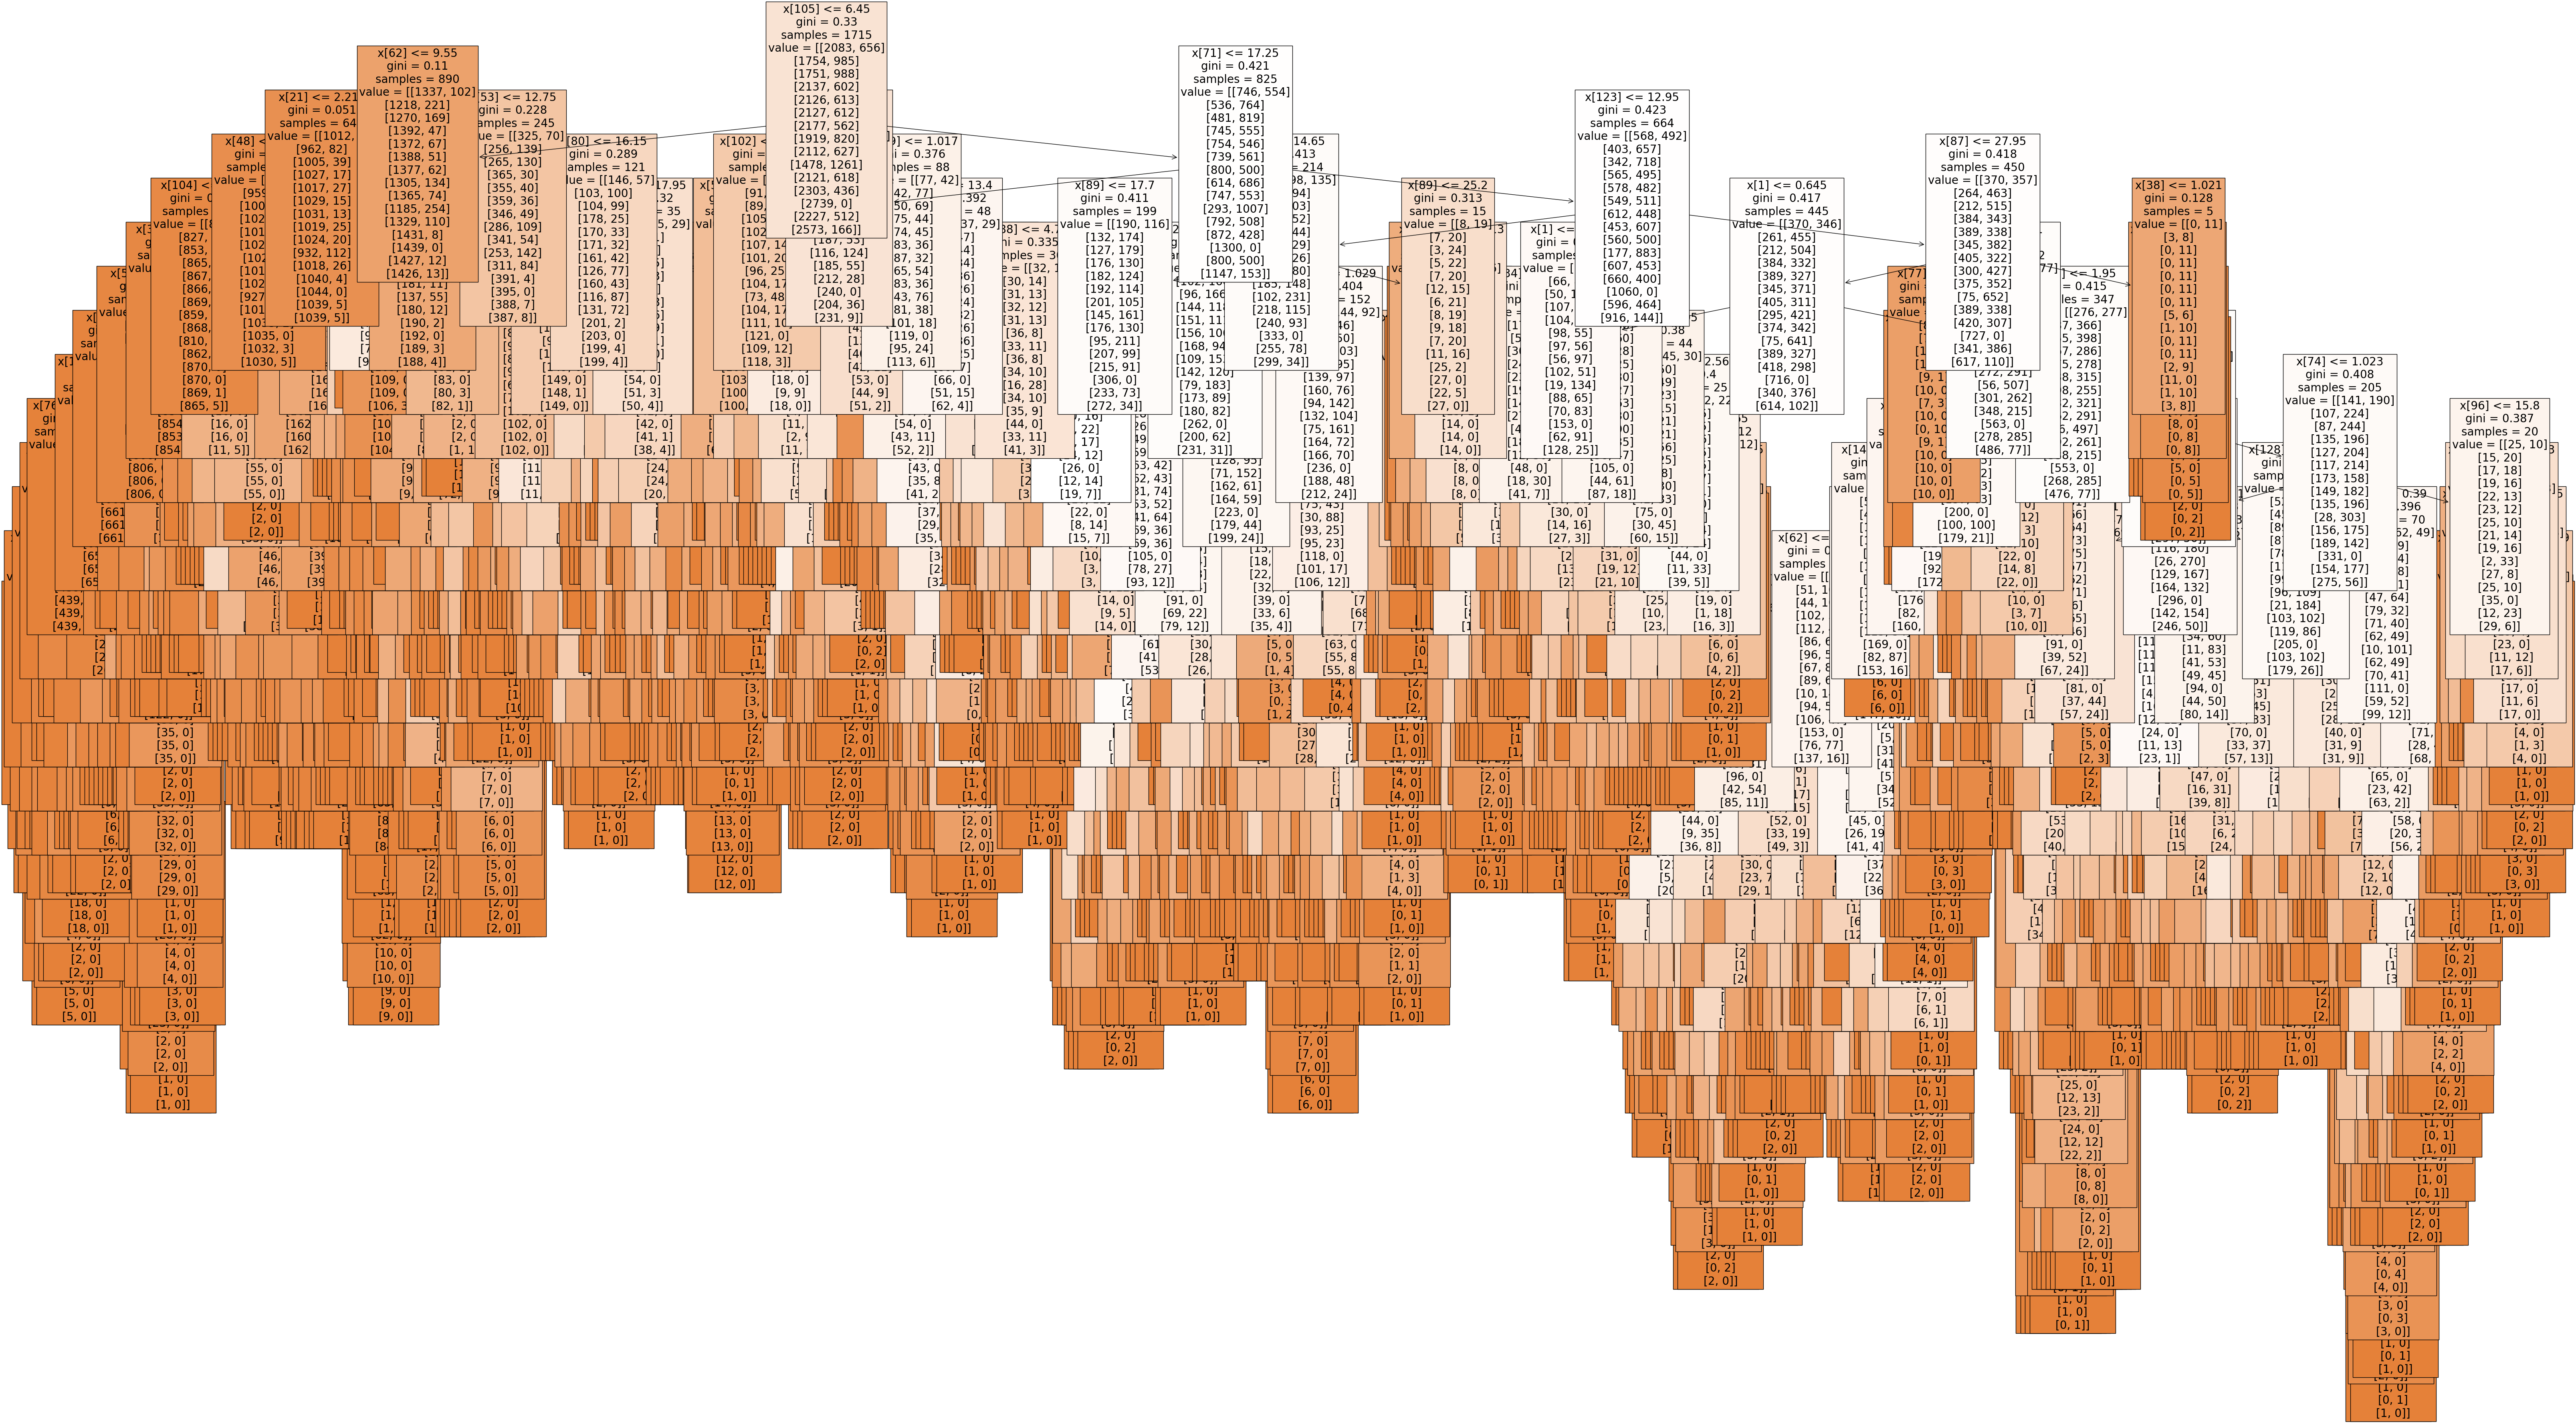

In [68]:
# Class-names = {0:'Unpleasant Weather', 1:'Pleasant Weather'}

fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[15], fontsize = 20, filled=True);

In [69]:
fig.savefig(os.path.join(path, 'random_forest_2000s.png'),bbox_inches='tight')

# 6. Uncovering Feature Importances

In [70]:
# Retrieve feature importances from the trained model

newarray = clf.feature_importances_
print(clf.feature_importances_.shape)
newarray

(135,)


array([0.00309827, 0.00557844, 0.        , 0.00679047, 0.00326187,
       0.00553359, 0.00990192, 0.00696276, 0.00549868, 0.00340839,
       0.00595902, 0.00621687, 0.00707384, 0.00300256, 0.00583644,
       0.01293302, 0.01244317, 0.00748982, 0.00336644, 0.00593314,
       0.00618607, 0.00845988, 0.00306523, 0.00593017, 0.02622208,
       0.01899155, 0.01196268, 0.00321471, 0.00503945, 0.00557763,
       0.00642539, 0.00341498, 0.00494285, 0.01371515, 0.00664236,
       0.01095745, 0.00310703, 0.00529978, 0.00546046, 0.00805783,
       0.00315718, 0.00532751, 0.00943214, 0.00604932, 0.01866148,
       0.00346353, 0.0056127 , 0.0055094 , 0.00800069, 0.00256477,
       0.00593864, 0.00955115, 0.00758878, 0.01216937, 0.00318034,
       0.00577364, 0.0051424 , 0.00651994, 0.00330026, 0.00548627,
       0.01700545, 0.01119338, 0.01666814, 0.00335492, 0.00543772,
       0.00563824, 0.00719291, 0.00347023, 0.00507967, 0.02444531,
       0.01671412, 0.01271412, 0.0031007 , 0.00520296, 0.00526

In [71]:
# Reshape newarray

newarray = newarray.reshape(-1,15,9)
print(newarray.shape)
newarray

(1, 15, 9)


array([[[0.00309827, 0.00557844, 0.        , 0.00679047, 0.00326187,
         0.00553359, 0.00990192, 0.00696276, 0.00549868],
        [0.00340839, 0.00595902, 0.00621687, 0.00707384, 0.00300256,
         0.00583644, 0.01293302, 0.01244317, 0.00748982],
        [0.00336644, 0.00593314, 0.00618607, 0.00845988, 0.00306523,
         0.00593017, 0.02622208, 0.01899155, 0.01196268],
        [0.00321471, 0.00503945, 0.00557763, 0.00642539, 0.00341498,
         0.00494285, 0.01371515, 0.00664236, 0.01095745],
        [0.00310703, 0.00529978, 0.00546046, 0.00805783, 0.00315718,
         0.00532751, 0.00943214, 0.00604932, 0.01866148],
        [0.00346353, 0.0056127 , 0.0055094 , 0.00800069, 0.00256477,
         0.00593864, 0.00955115, 0.00758878, 0.01216937],
        [0.00318034, 0.00577364, 0.0051424 , 0.00651994, 0.00330026,
         0.00548627, 0.01700545, 0.01119338, 0.01666814],
        [0.00335492, 0.00543772, 0.00563824, 0.00719291, 0.00347023,
         0.00507967, 0.02444531, 0.0167141

In [72]:
# Collapse this shape into one observation for each weather station

sumarray = np.sum(newarray[0], axis=1)
sumarray

array([0.046626  , 0.06436313, 0.09011724, 0.05992999, 0.06455272,
       0.06039904, 0.07426981, 0.08404724, 0.0499797 , 0.07682689,
       0.0514708 , 0.10508463, 0.05326157, 0.06615358, 0.05291767])

In [73]:
# Convert the set of unique stations to a list

unique_stations_list = list(unique_stations)

In [74]:
important = pd.Series(sumarray, index = unique_stations_list)
important = important.sort_values(ascending = False)
important

DEBILT        0.105085
KASSEL        0.090117
BUDAPEST      0.084047
OSLO          0.076827
STOCKHOLM     0.074270
BELGRADE      0.066154
LJUBLJANA     0.064553
MAASTRICHT    0.064363
MADRID        0.060399
BASEL         0.059930
SONNBLICK     0.053262
VALENTIA      0.052918
DUSSELDORF    0.051471
HEATHROW      0.049980
MUNCHENB      0.046626
dtype: float64

In [75]:
# Create a df to associate weather stations with their importances

df_importance = pd.DataFrame({
    'Weather Station': unique_stations_list,
    'Importance': sumarray
})

df_importance = df_importance.sort_values(by='Importance', ascending = False)

['MUNCHENB', 'MAASTRICHT', 'KASSEL', 'BASEL', 'LJUBLJANA', 'MADRID', 'STOCKHOLM', 'BUDAPEST', 'HEATHROW', 'OSLO', 'DUSSELDORF', 'DEBILT', 'SONNBLICK', 'BELGRADE', 'VALENTIA']


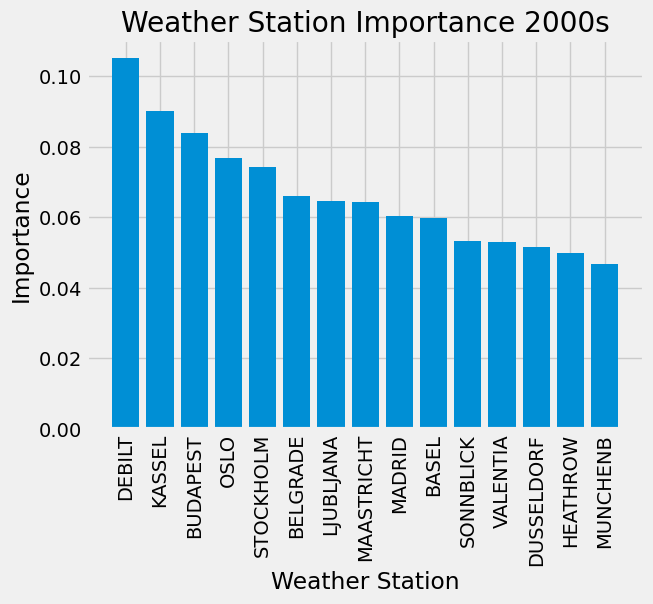

In [76]:
# Plot the results

%matplotlib inline

plt.style.use('fivethirtyeight')
print(unique_stations_list)

plt.bar(df_importance['Weather Station'], df_importance['Importance'], orientation = 'vertical')
plt.xticks(rotation='vertical')
plt.xlabel('Weather Station')
plt.ylabel('Importance')
plt.title('Weather Station Importance 2000s')

plt.savefig(os.path.join(path, '2000s_feauture_importances.png'), bbox_inches='tight')

plt.show()